In [12]:
from lavis.models import model_zoo

print(model_zoo)

Architectures                  Types
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_Japanese_feature_extractor pretrain, pretrain_vitL, coco
blip2_Japanese                 pretrain, pretrain_vitL, coco
blip2_image_text_matching      pretrain, pretrain_vitL, coco
clip_feature_extractor         ViT-B-32, ViT-B-16, ViT-L-14, ViT-L-14-336, RN50
clip                           ViT-B-32, ViT-B-16, ViT-L-14, ViT-L-14-336, RN50


In [13]:
from lavis.models import load_model_and_preprocess

model, visual_encoder, text_encoder = load_model_and_preprocess('blip2_Japanese', 'pretrain')

In [20]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class SampleDataset(Dataset):

    def __init__(self, img_root, visual_processor) -> None:
        super().__init__()
        self.img_root = img_root
        self.imgs = os.listdir(img_root)
        self.visual_processor = visual_processor

    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        image_path = os.path.join(self.img_root, self.imgs[index])
        raw_image = Image.open(image_path).convert("RGB")
        display(raw_image)
        image = self.visual_processor(raw_image)

        return { "image" : image }
    
sample_dataloader = DataLoader(SampleDataset('./samples/', visual_encoder['train']), batch_size= 1)



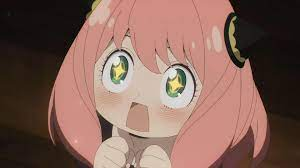

['ピンク の 髪 の 女の子 が 大きく 口 を 開け て いる']


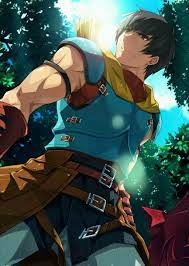

['青い 服 を 着 た 男性 が ゲーム の コントローラー を 持っ て いる']


In [23]:
for item in sample_dataloader:
    print(model.generate(item)) # To use nucleus sampling instead of top k (to generate different captions), set use_nucleus_sampling=True


In [27]:
visual_encoder['train'](Image.open('./samples/anya.jpg')).shape

torch.Size([3, 224, 224])

In [36]:
model.forward_image(visual_encoder['eval'](Image.open('./samples/anya.jpg')).unsqueeze(0))

(tensor([[[ 0.3783, -1.0832,  0.1098,  ...,  0.6589,  0.0653,  0.5280],
          [ 0.4702, -0.9583,  0.1473,  ...,  0.5587,  0.1773,  0.3969],
          [ 0.0624, -0.0320, -0.5091,  ..., -0.0258,  0.5504,  0.5200],
          ...,
          [ 0.4704, -1.0768, -0.1742,  ...,  0.2460,  0.0326,  0.7118],
          [ 0.2457, -0.2772, -0.4044,  ...,  0.1272,  0.0476,  0.4056],
          [ 0.3592, -1.0502, -0.4229,  ..., -0.0827,  0.0624,  0.7419]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[ 0.6279,  0.5806, -0.0089,  ...,  0.3117, -0.1515,  0.1399],
          [ 1.4006,  0.0678, -0.9805,  ...,  1.1147,  0.4541, -0.2842],
          [ 0.9735,  0.6035,  0.3978,  ...,  0.2664, -0.3175,  0.5481],
          ...,
          [ 0.0790,  0.0238,  0.1358,  ...,  0.6094, -1.2057,  0.5648],
          [-0.5129,  0.9170,  0.6652,  ..., -0.1693, -0.5496, -0.7583],
          [ 0.9117,  0.3480, -0.8864,  ...,  1.3496,  0.3255, -0.3969]]],
        grad_fn=<NativeLayerNormBackward0>))

In [49]:
flicker30k_dir = '/lavis/Japanese_Dataset/flickr30k/images/'
images = os.listdir(flicker30k_dir)
model.to('cuda')

datafile = []
for image in images:
    pilim = Image.open(os.path.join(flicker30k_dir, image))
    input_tensor = visual_encoder['eval'](pilim).unsqueeze(0)
    entry  = {}
    entry['image'] = image
    entry['caption'] = model.generate({"image" : input_tensor.to('cuda') })
    datafile.append(entry)

In [52]:
import json

with open('./flickr30k_caption.json', 'w') as f:
    json.dump(datafile, f)
 